<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mean(a_list):
  return sum(a_list)/len(a_list)

def variance(a_list):
  return sum([((entry-mean(a_list))**2) for entry in a_list])/len(a_list)

def stdv(a_list):
  return (variance(a_list)**.5)

In [10]:
mean(sales), variance(sales), stdv(sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

In [12]:
#check our work
import numpy as np

np.mean(sales), np.var(sales), np.std(sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [16]:
customers = [127,80,105,92,120,115,93]

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

In [0]:
def covariance(vector1, vector2):
  assert len(vector1) == len(vector2), 'Vectors must be equal length'
  
  mean1 = mean(vector1)
  mean2 = mean(vector2)
  
  total = 0
  for i in range(len(vector1)):
    total+=((vector1[i]-mean1)*(vector2[i]-mean2))
  return total/(len(vector1)-1)

In [24]:
covariance(customers, sales)

7604.357142857142

In [17]:
#check our work
np.cov(customers, sales)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
###THIS IS NOT WORKING###
def correlation_coefficient(vector1,vector2):
    scorex = []
    scorey = []

    for i in vector1: 
        scorex.append((i - mean(vector1))/stdv(vector1)) 

    for j in vector2:
        scorey.append((j - mean(vector2))/stdv(vector2))

# multiplies both lists together into 1 list (hence zip) and sums the whole list   
    return (sum([i*j for i,j in zip(scorex,scorey)]))/(len(vector1)-1)

In [53]:
correlation_coefficient(sales,customers)

1.1233063074507061

In [55]:
np.corrcoef(customers, sales)[0,1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic = titanic.set_index('Unnamed: 0')

In [62]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [64]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

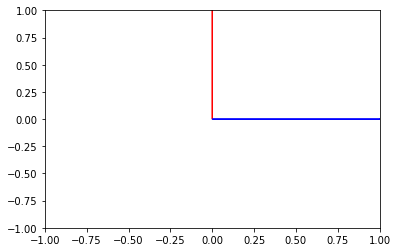

In [70]:
#perpendicular == orthogonal
a = [0,1]
b = [1,0]

plt.arrow(0,0,a[0],a[1], color='r')
plt.arrow(0,0,b[0],b[1], color='b')

plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]
b = [ 6,-8, 2]

In [73]:
if np.dot(a,b) == 0:
  print('orthogonal')
else:
  print('not orthogonal')

not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [88]:
np.linalg.norm(c)**2

665.0

In [89]:
np.dot(c,c)

665

In [95]:
np.matmul(c.T,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$ d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

$$ d = 2\begin{bmatrix} 1 \\ 0\\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [103]:
f = [4,12,11,9,2]

f/np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [107]:
a_d = [1,2,3]
b_d = [2,2,3]
print(np.dot(a_d,b_d))

a_i = [1,0,1]
b_i = [0,1,0]
print(np.dot(a_i,b_i))

15
0


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$$ span(g, h) = x\begin{bmatrix} 1 & 2 \end{bmatrix} $$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

$$ span(l,m,n) = x\begin{bmatrix} 1 & 2 & 3 \end{bmatrix} + y\begin{bmatrix} -1 & 0 & 7 \end{bmatrix} +  z\begin{bmatrix} 4 & 8 & 2 \end{bmatrix}$$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
x = [1,0]
y = [0,1]

## 6.2 What does it mean to form a basis?

The basis of a vector space V is a set of vectors that are linearly independent and that span the vector space V.

A set of vectors spans a space if their linear combinations fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [120]:
p = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = [1,3]
w = [-1,2]

proj = np.multiply((np.dot(w,v)/np.dot(v,v)),v)

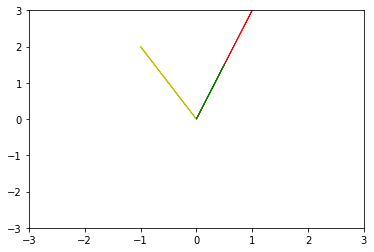

In [128]:
plt.arrow(0,0,v[0],v[1], color='r')
plt.arrow(0,0,w[0],w[1], color='y')
plt.arrow(0,0,proj[0],proj[1], color='g')

plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
def projection(x,y,v):
  w = [[x[i],y[i]] for i in range(len(x))]
  return [np.multiply((np.dot(w[i],v)/np.dot(v,v)),v) for i in range(len(w))]

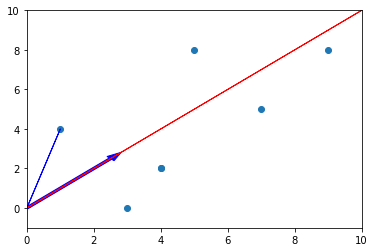

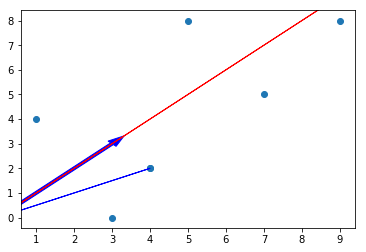

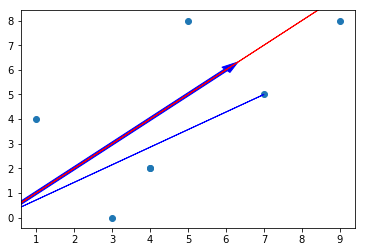

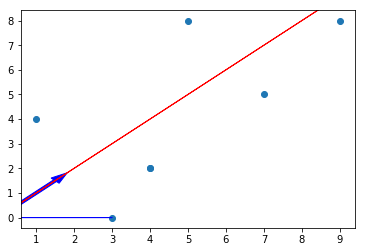

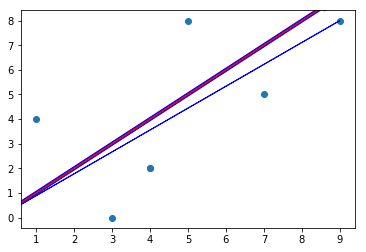

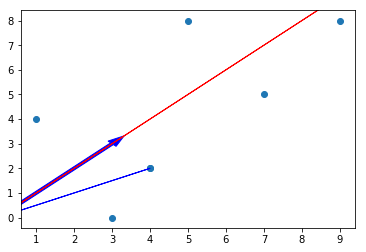

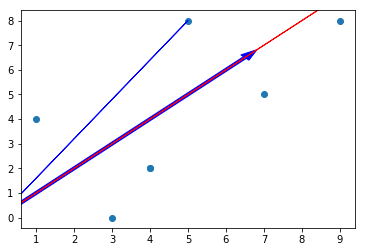

In [146]:
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]
v=[10,10]
projections = projection(x_values,y_values,v)

plt.xlim(0,10)
plt.ylim(-1,10)

for i in range(len(projections)):
  plt.scatter(df.x, df.y)
  plt.arrow(0,0,x_values[i],y_values[i],color='b')
  plt.arrow(0,0,projections[i][0],projections[i][1],color='b',width=.1)
  plt.arrow(0,0,v[0],v[1], color='r')
  plt.show()